## Plotting and Visualization

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 2. Plotting with pandas and seaborn

In [3]:
%matplotlib notebook

In [4]:
plt.close('all')

### 2.1 Line Plots

In [5]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0,100,10))

<IPython.core.display.Javascript object>


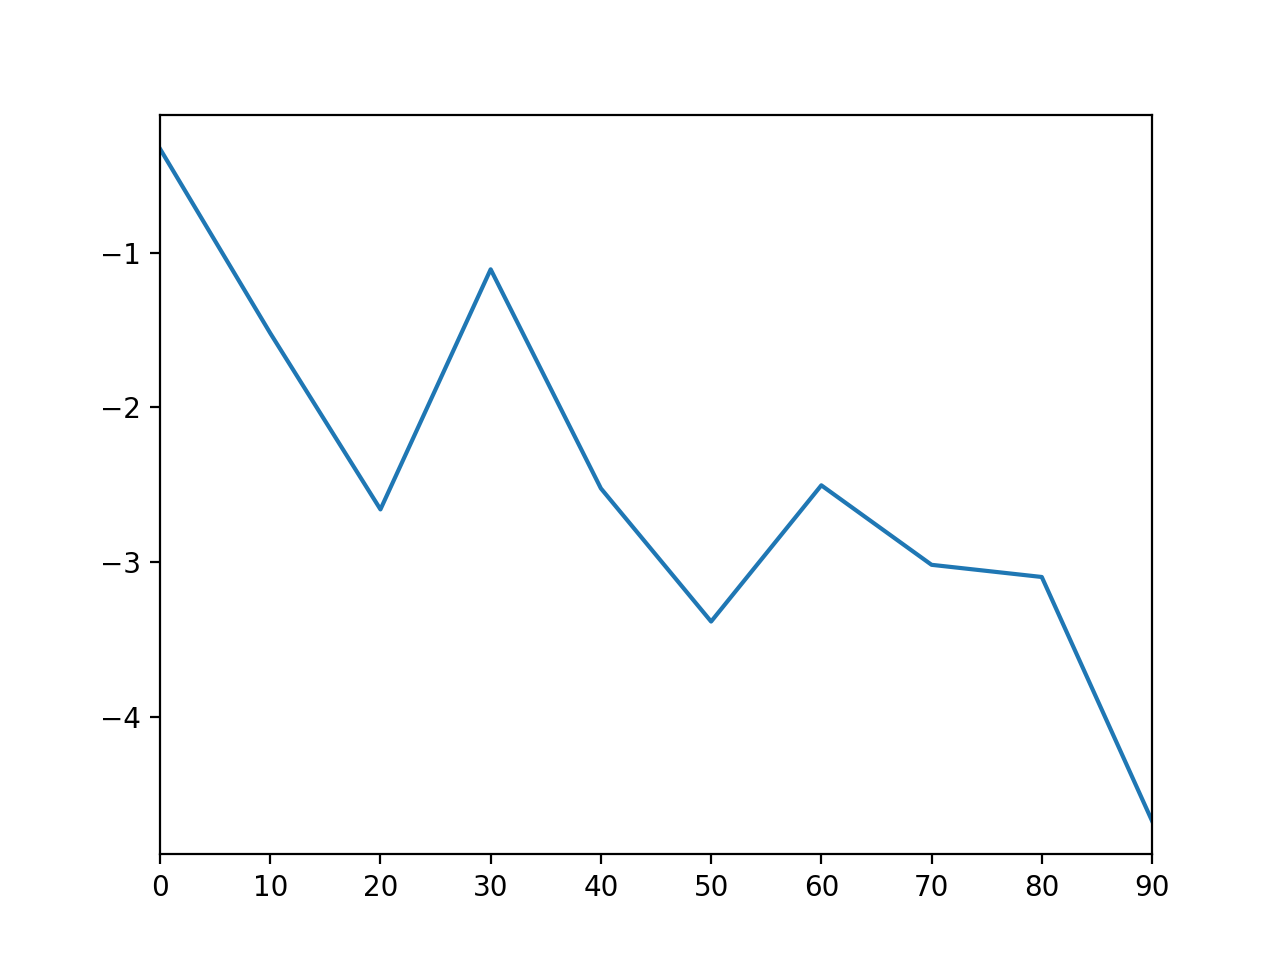

In [7]:
s.plot()

In [8]:
df = pd.DataFrame(np.random.randn(10,4).cumsum(0), 
                  columns=['A','B','C','D'], 
                  index=np.arange(0,100,10))

In [9]:
df

,A,B,C,D
0,-0.794574,-0.892174,-0.493469,-0.740482
10,-1.665692,-0.985305,-2.055433,-1.190443
20,-1.578065,-0.250114,-4.334649,0.460043
30,-1.855835,1.526072,-4.888494,1.186337
40,-2.449688,2.391954,-5.582197,1.764890
50,-2.370429,3.149419,-4.681022,-0.038242
60,-1.003070,3.182823,-4.829537,-0.435575
70,-1.700885,1.142838,-4.604241,-0.129271
80,-1.590542,1.012402,-4.974940,1.229324
90,-2.955176,0.727381,-5.788495,1.410439


<IPython.core.display.Javascript object>


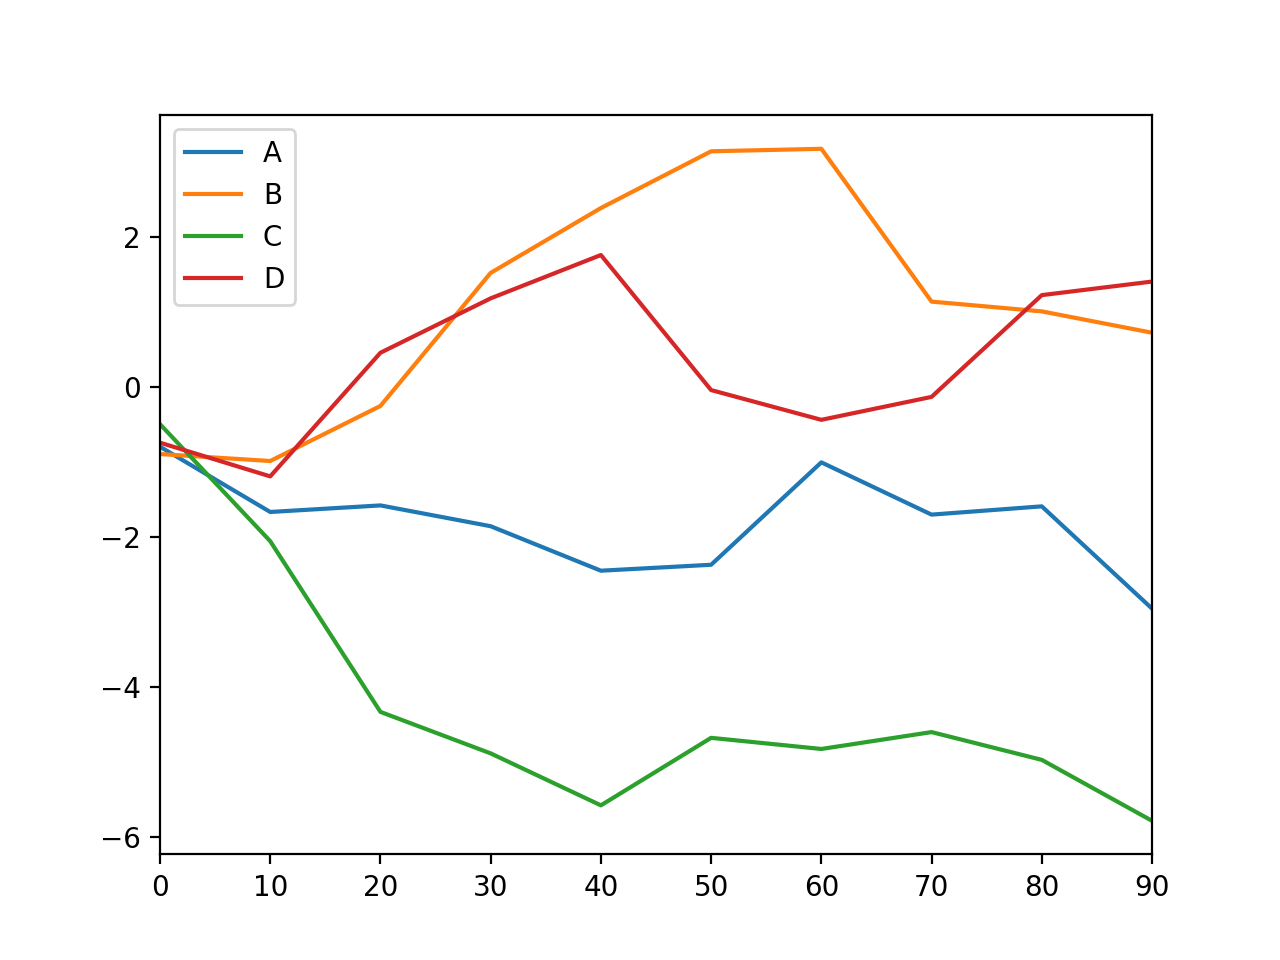

In [10]:
df.plot()

### 2.2 Bar Plot

<IPython.core.display.Javascript object>


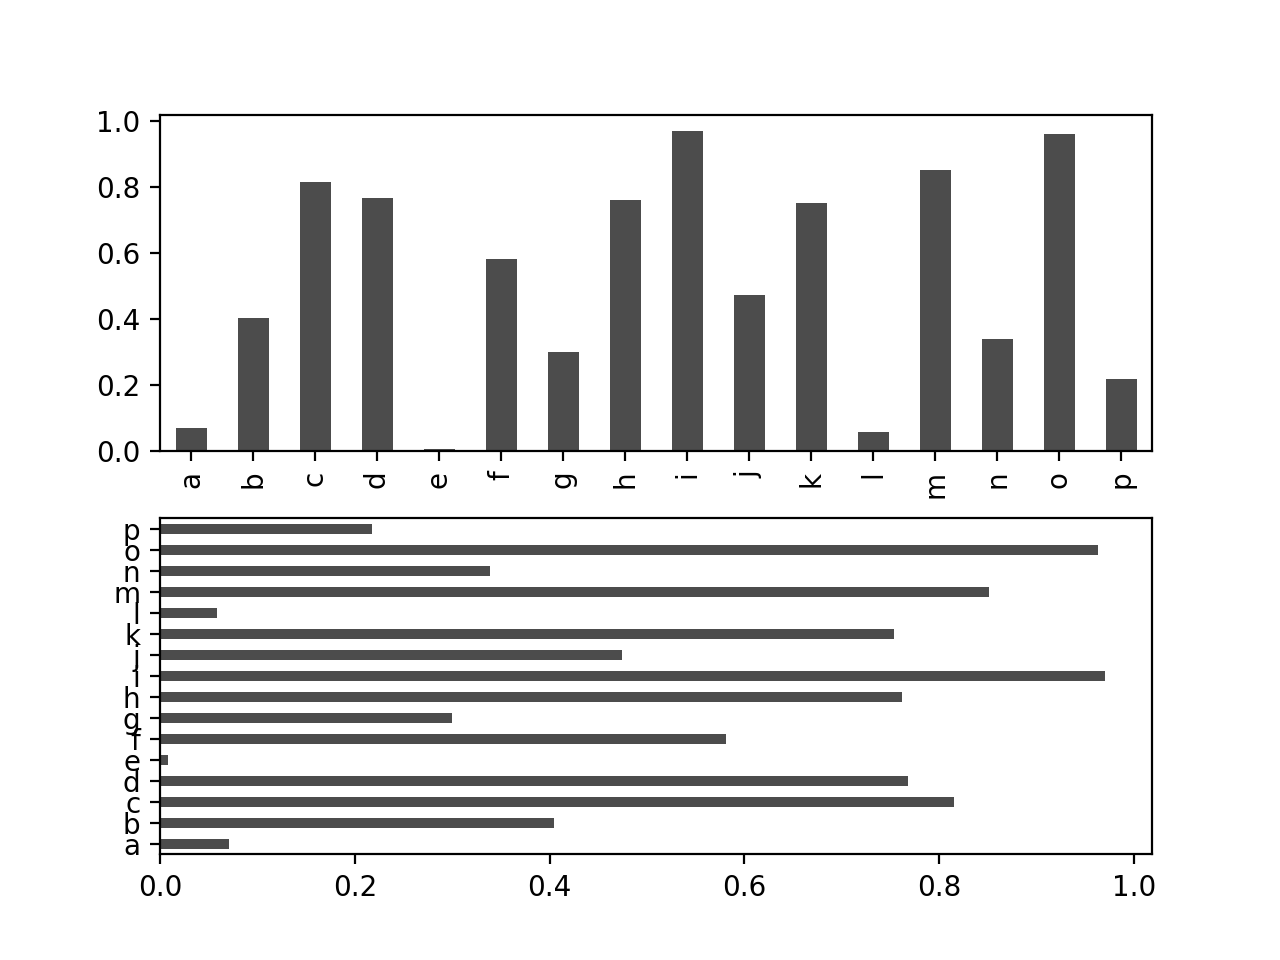

In [12]:
fig, axes = plt.subplots(2,1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

In [13]:
df = pd.DataFrame(np.random.rand(6,4),
                 index=['one', 'two', 'three', 'four', 'five', 'six'],
                 columns=pd.Index(['A','B','C','D'], name='Genus'))

In [14]:
df

Genus,A,B,C,D
one,0.467680,0.044837,0.162758,0.490105
two,0.760866,0.083021,0.396280,0.374785
three,0.474752,0.825050,0.158350,0.141689
four,0.790424,0.409889,0.992848,0.634364
five,0.266692,0.569633,0.103980,0.073911
six,0.022907,0.681853,0.501227,0.448087


<IPython.core.display.Javascript object>


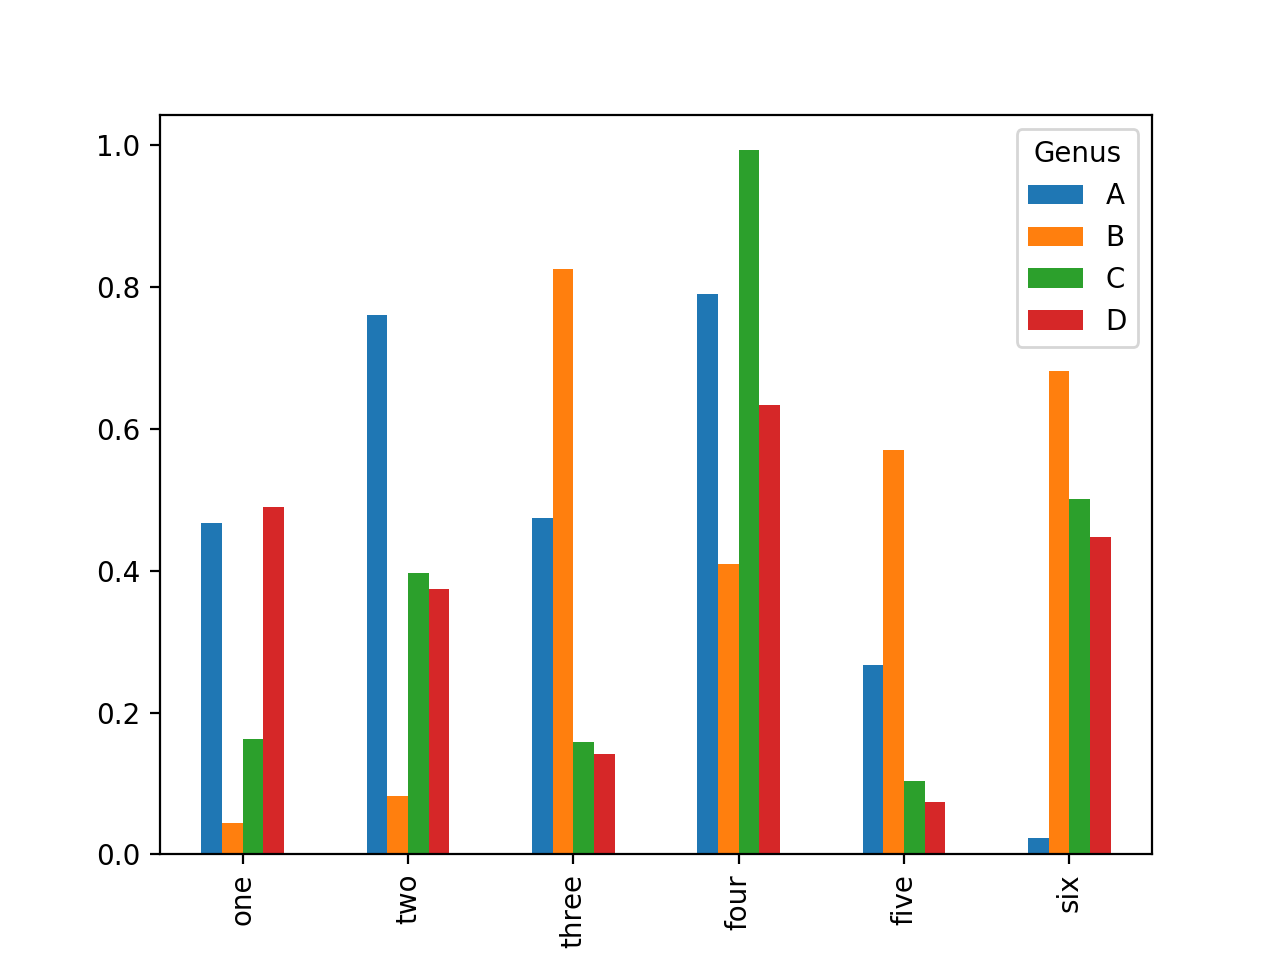

In [15]:
df.plot.bar()

<IPython.core.display.Javascript object>


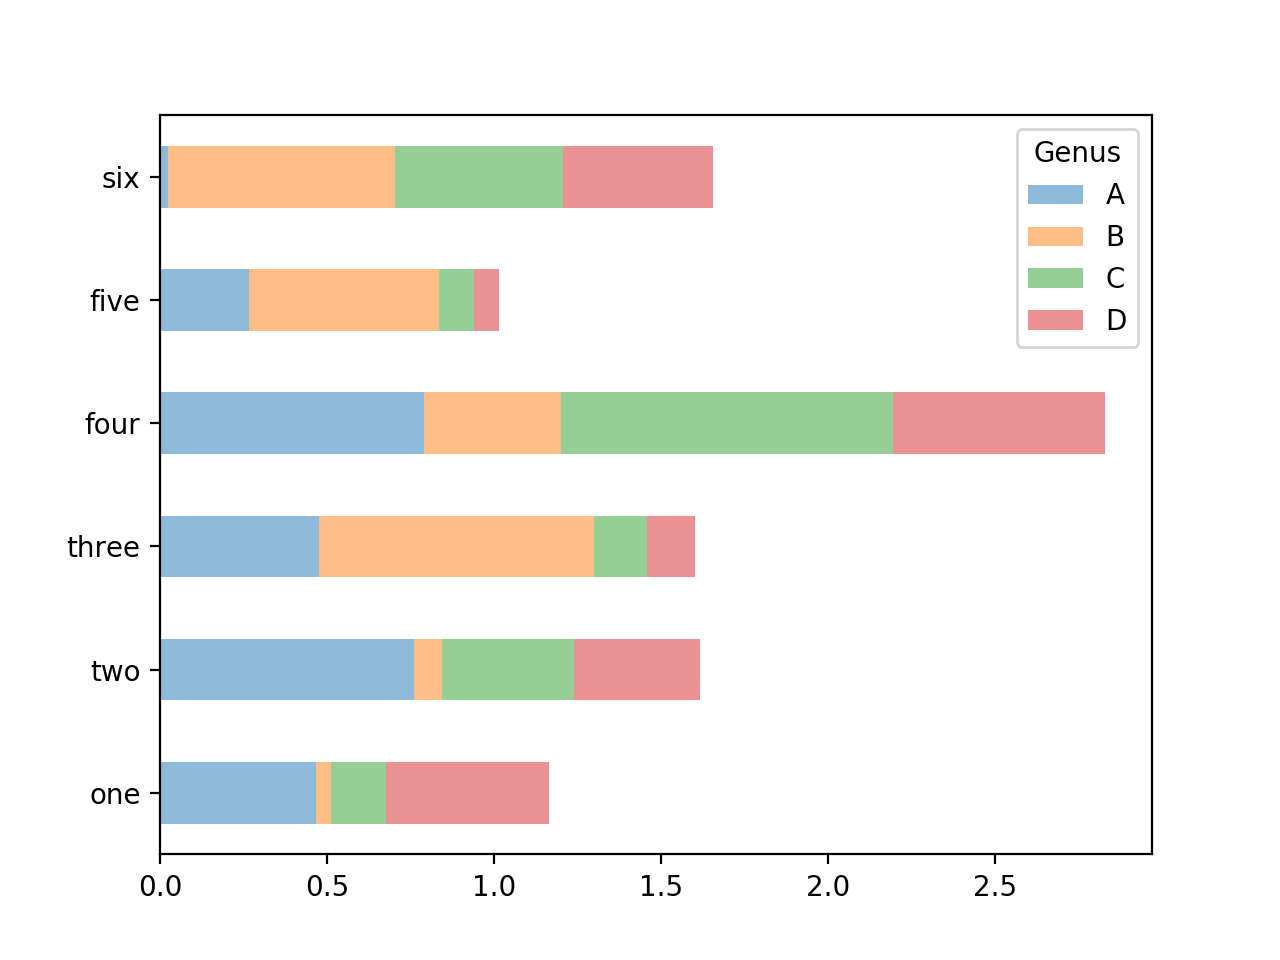

In [16]:
df.plot.barh(stacked=True, alpha=0.5)

In [43]:
tips = pd.read_csv('tips.csv')
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [32]:
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [33]:
party_counts = party_counts.loc[:, 2:5]
party_counts

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


In [34]:
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


<IPython.core.display.Javascript object>


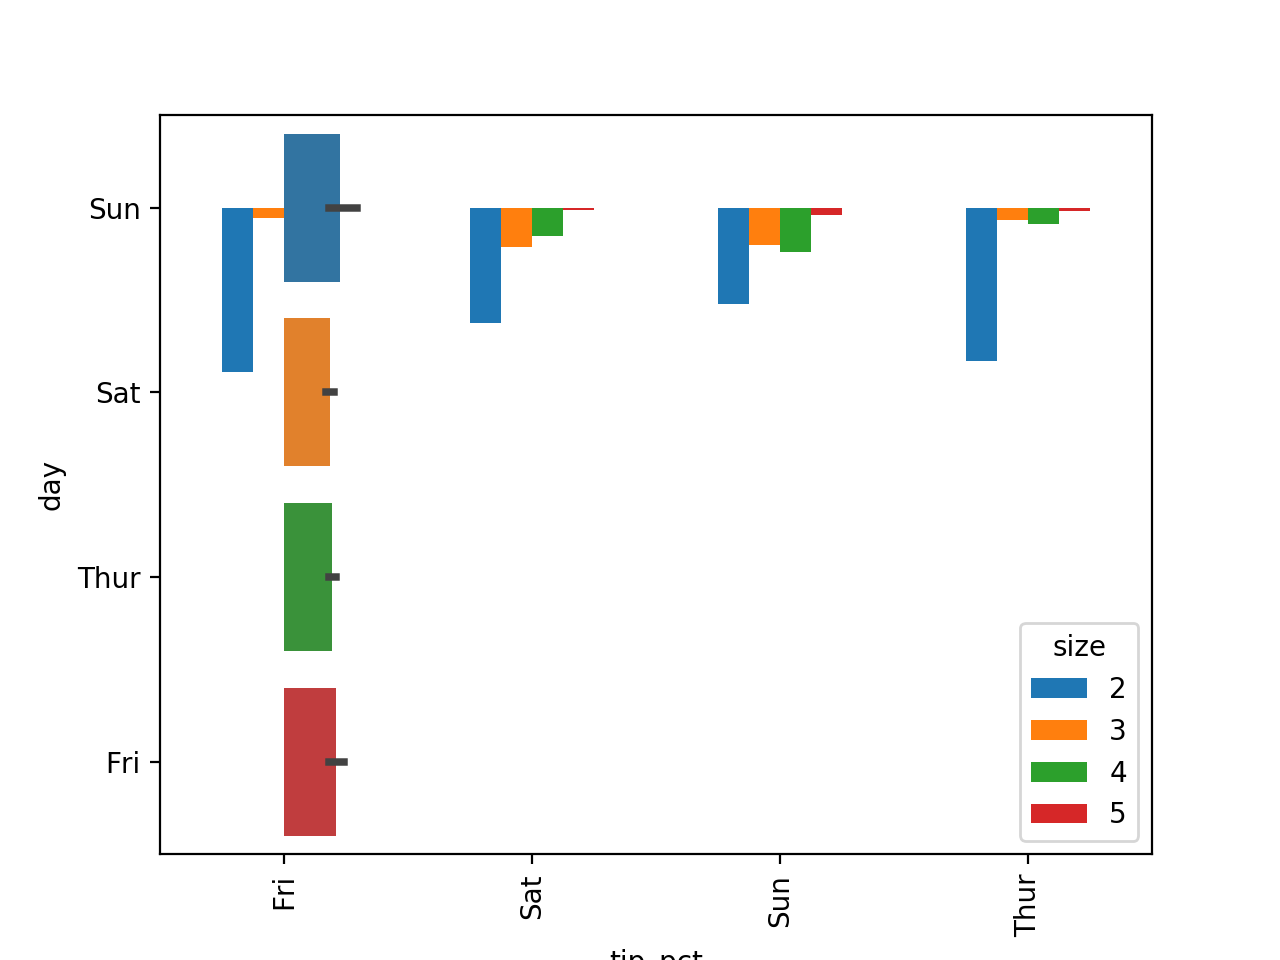

In [35]:
party_pcts.plot.bar()

In [23]:
plt.close('all')

In [36]:
import seaborn as sns

In [47]:
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


In [48]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

In [49]:
plt.close('all')

<IPython.core.display.Javascript object>


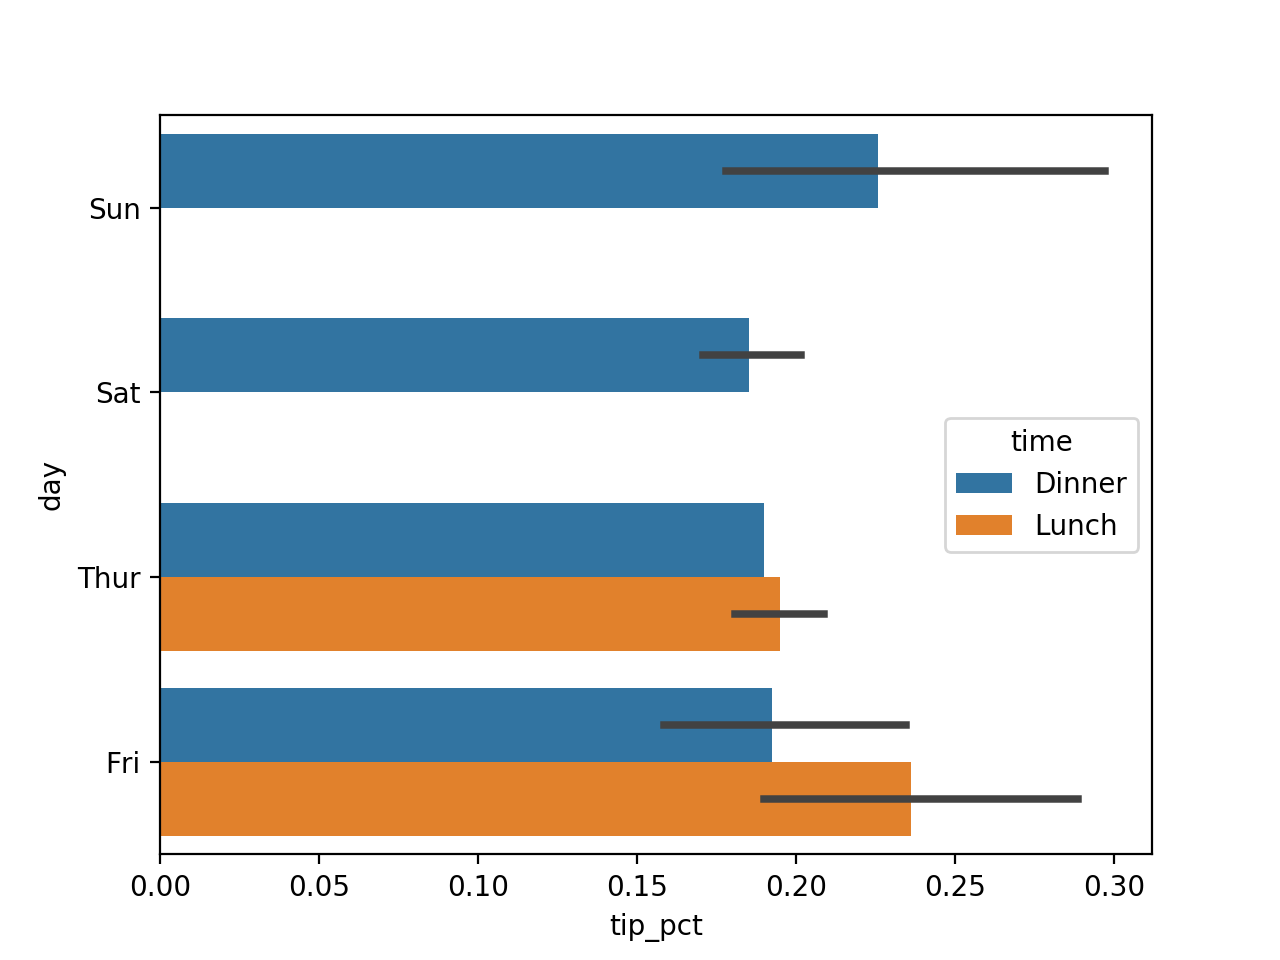

In [52]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

### 2.3 Histograms and Density Plots

<IPython.core.display.Javascript object>


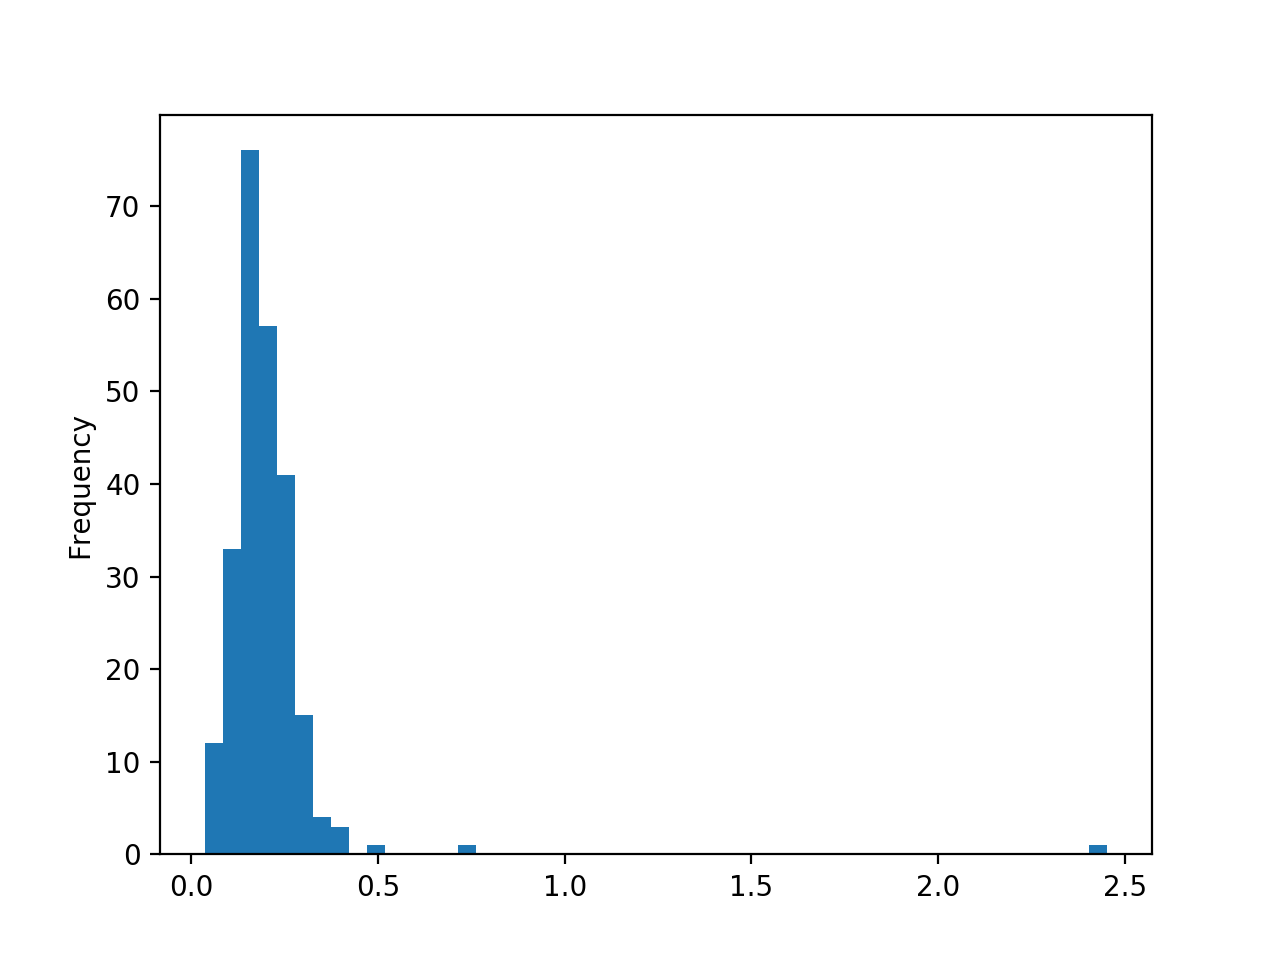

In [55]:
plt.figure()
tips['tip_pct'].plot.hist(bins=50)

<IPython.core.display.Javascript object>


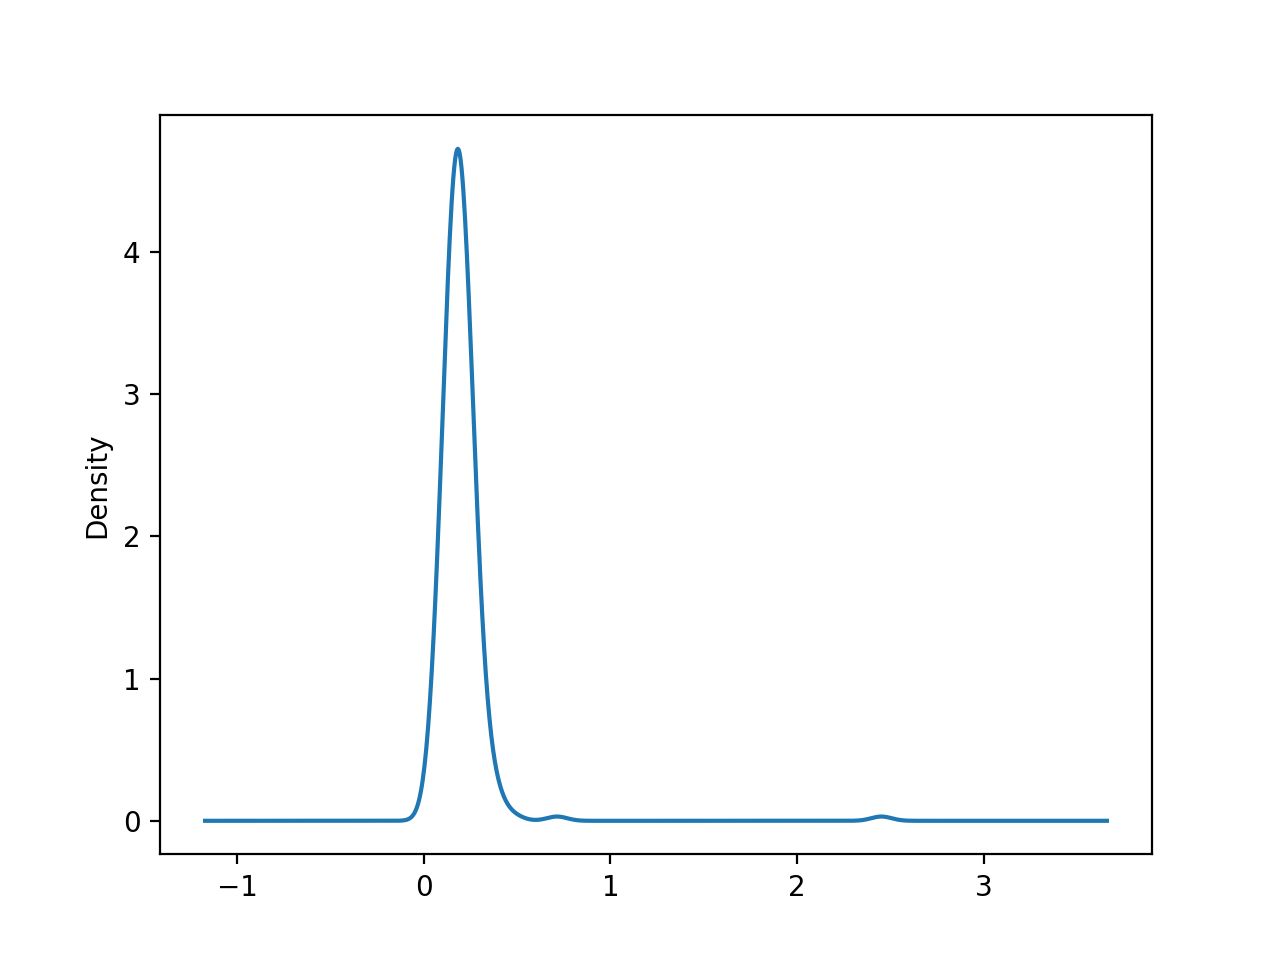

In [56]:
plt.figure()
tips['tip_pct'].plot.density()

In [58]:
comp1 = np.random.normal(0,1,size=200)
comp2 = np.random.normal(10,2,size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
values.head()

0   -0.920627
1    0.445992
2   -0.414111
3   -2.274557
4    0.594219
dtype: float64

<IPython.core.display.Javascript object>


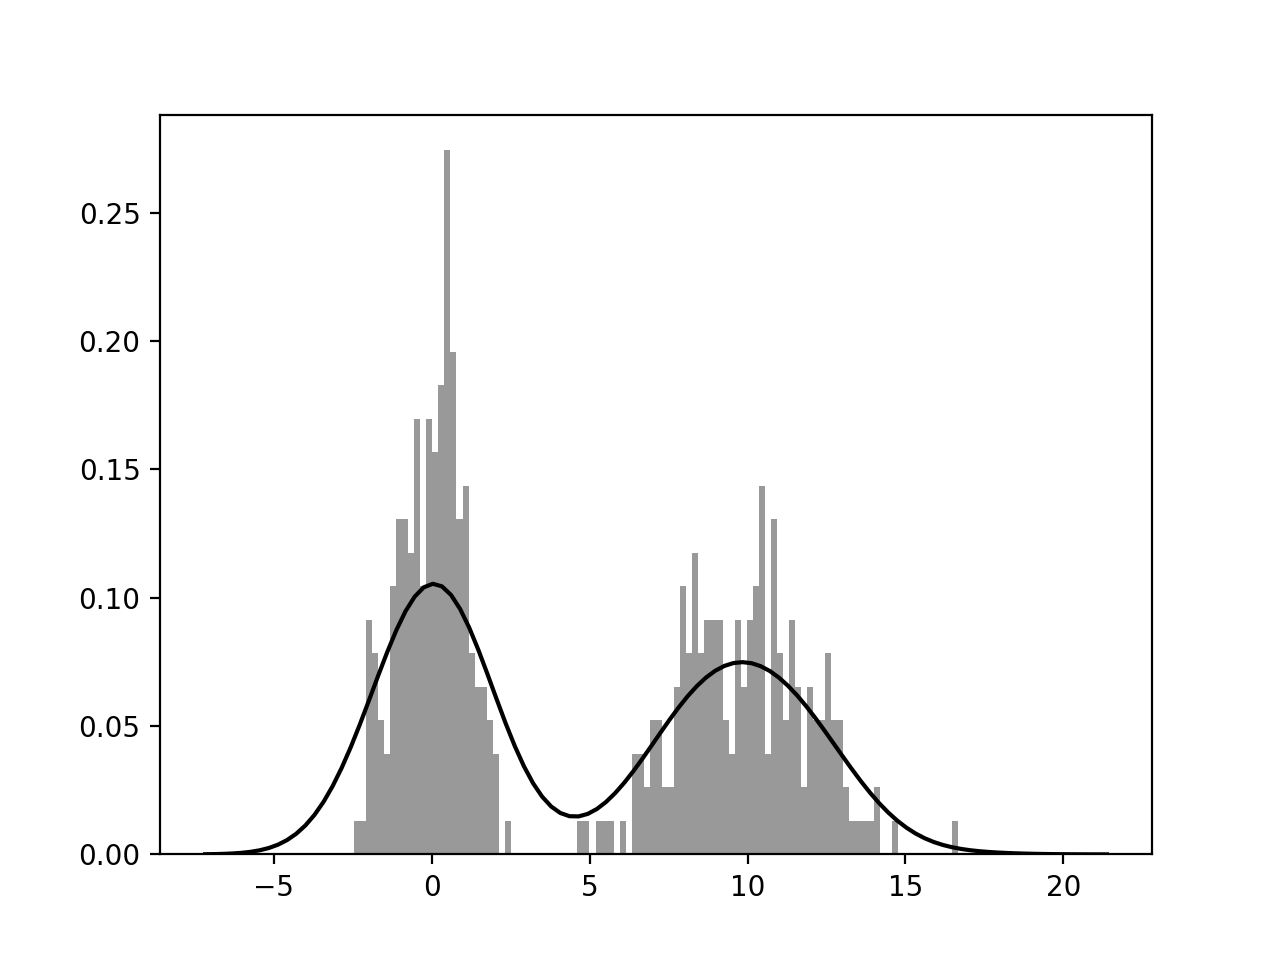

In [59]:
plt.figure()
sns.distplot(values, bins=100, color='k')

### 2.4 Scatter or Point Plots

In [62]:
macro = pd.read_csv('macrodata.csv')
data = macro[['cpi','m1','tbilrate','unemp']]
data.head()

,cpi,m1,tbilrate,unemp
0,28.98,139.7,2.82,5.8
1,29.15,141.7,3.08,5.1
2,29.35,140.5,3.82,5.3
3,29.37,140.0,4.33,5.6
4,29.54,139.6,3.50,5.2


In [63]:
trans_data = np.log(data).diff().dropna()
trans_data.head()

,cpi,m1,tbilrate,unemp
1,0.005849,0.014215,0.088193,-0.128617
2,0.006838,-0.008505,0.215321,0.038466
3,0.000681,-0.003565,0.125317,0.055060
4,0.005772,-0.002861,-0.212805,-0.074108
5,0.000338,0.004289,-0.266946,0.000000


<IPython.core.display.Javascript object>


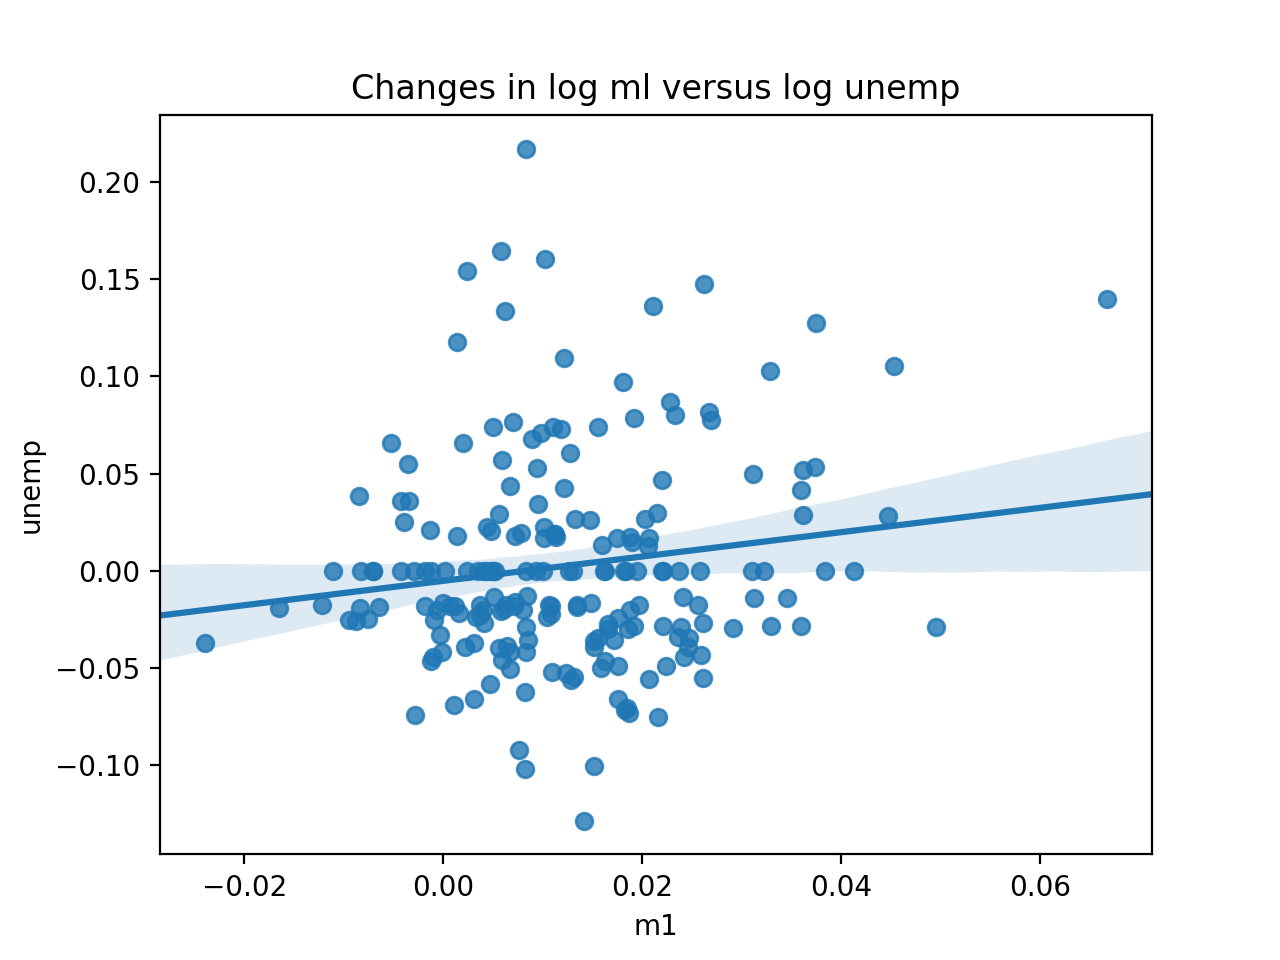

Text(0.5, 1.0, 'Changes in log ml versus log unemp')

In [64]:
plt.figure()
sns.regplot('m1','unemp',data=trans_data)
plt.title('Changes in log %s versus log %s' % ('ml', 'unemp'))

<IPython.core.display.Javascript object>


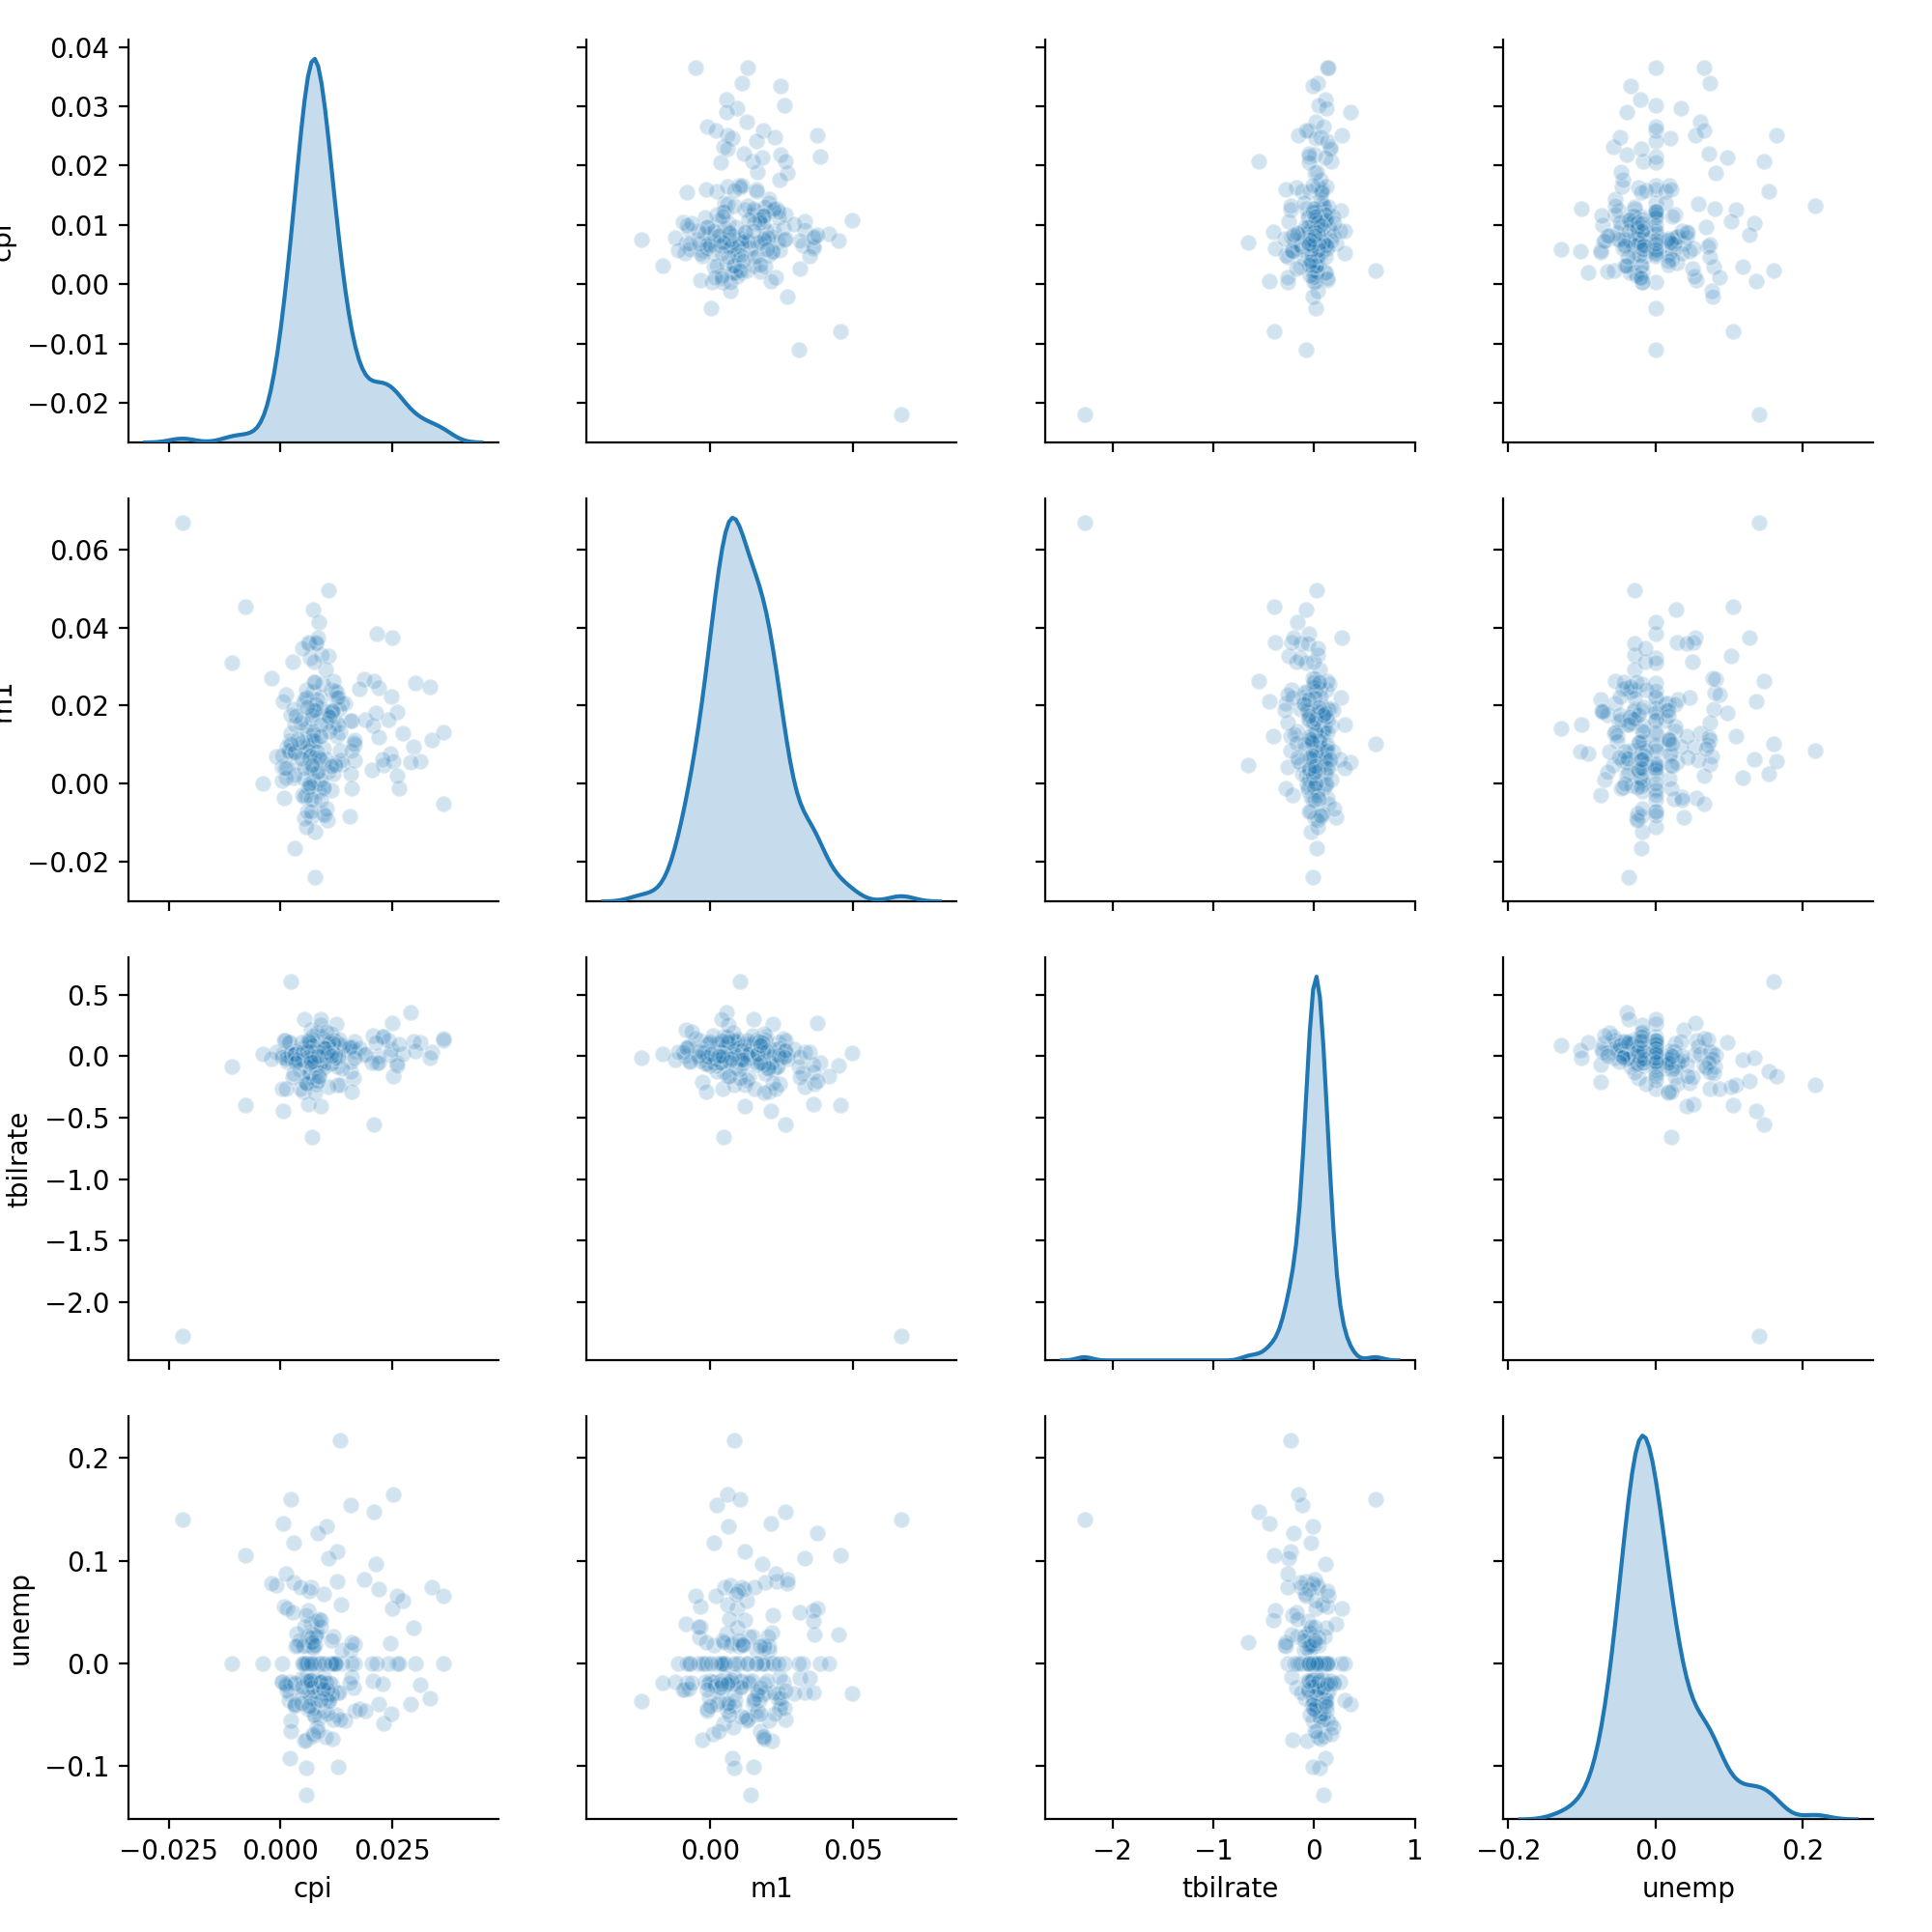

In [66]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws = {'alpha':0.2})

### 2.5 Facet Grids and Categorical Data

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<IPython.core.display.Javascript object>


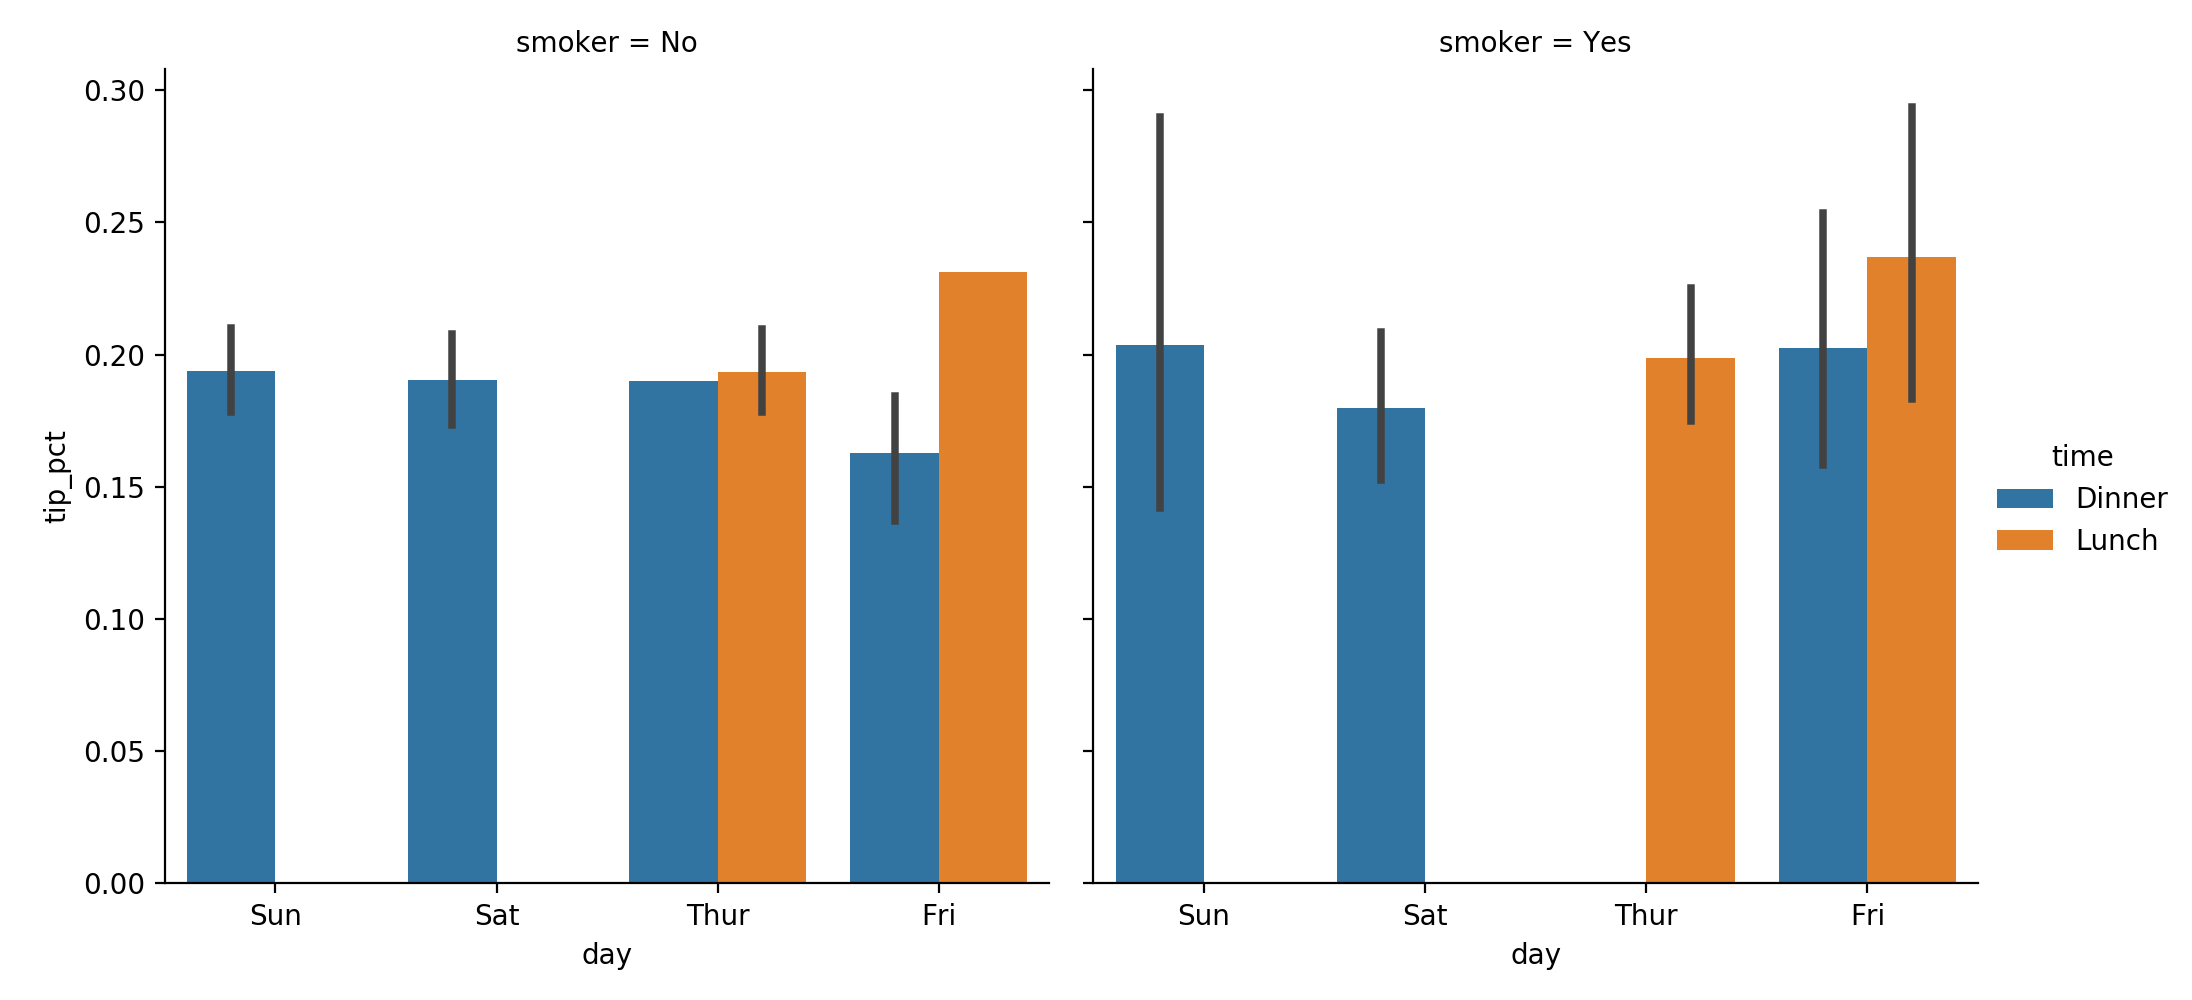

In [67]:
sns.factorplot(x='day', y='tip_pct', hue='time', col='smoker', kind='bar', data=tips[tips.tip_pct<1])

In [ ]:
sns.factorplot(x='day', y='tip_pct', row='time', col='smoker', )